# 🧬 Evolutionary TSP Solver - Demo

Bu notebook, geliştirdiğimiz **Evolutionary TSP** kütüphanesini kullanarak Gezgin Satıcı Problemini (TSP) çözer ve sonuçları görselleştirir.

### İçerik:
1. Kütüphaneleri Yükle
2. Veriyi (.tsp) Oku
3. Genetik Algoritmayı Yapılandır ve Çalıştır
4. Sonuçları (Rota ve Başarı Grafiği) Çizdir

In [1]:
# Gerekli kütüphaneler
import os
import sys
import matplotlib.pyplot as plt

In [2]:
# Proje ana dizinini path'e ekle (src klasörünü görebilmesi için)
# Not: Bu notebook 'notebooks/' klasöründe olduğu için bir üst dizine ('..') çıkıyoruz.
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

# Kendi yazdığımız modülleri import ediyoruz
from modules.utils import read_tsp_file
from modules.ga_engine import GeneticAlgorithm

### 1. Veriyi Yükle
Proje içindeki `data/` klasöründen bir TSP dosyası seçiyoruz.

In [3]:
# Veri dosyasının yolu
filename = os.path.join(project_root, 'data', 'att532.tsp')

if not os.path.exists(filename):
    print(f"Hata: Dosya bulunamadı -> {filename}")
else:
    # ARTIK SÖZLÜK DÖNÜYOR!
    tsp_data = read_tsp_file(filename)
    cities = tsp_data['cities']
    weight_type = tsp_data['edge_weight_type']
    
    print(f"✅ Veri Yüklendi: {len(cities)} Şehir")
    print(f"📏 Hesaplama Tipi: {weight_type}")

✅ Veri Yüklendi: 532 Şehir
📏 Hesaplama Tipi: ATT


### 2. Algoritmayı Yapılandır
Aşağıdaki parametreleri değiştirerek algoritmanın performansını test edebilirsin.

* **local_search_method**: `'2opt'` veya `'3opt'` seçerek hibrit yapıyı test et.

In [5]:
# HİPERPARAMETRELER
POP_SIZE = 150
GENERATIONS = 2000
MUTATION_RATE =0.01
ELITE_SIZE = 4

# YÖNTEM SEÇİMLERİ
SELECTION = "tournament"   # Seçenekler: tournament, roulette, rank
CROSSOVER = "ordered"      # Seçenekler: ordered, cycle
MUTATION = "inversion"     # Seçenekler: inversion, swap, insert
LOCAL_SEARCH = "3opt"      # Seçenekler: none, 2opt, 3opt

# Motoru Başlat
ga = GeneticAlgorithm(
    cities=cities,
    pop_size=POP_SIZE,
    mutation_rate=MUTATION_RATE,
    elite_size=ELITE_SIZE,
    selection_method=SELECTION,
    crossover_method=CROSSOVER,
    mutation_method=MUTATION,
    local_search_method=LOCAL_SEARCH,
    edge_weight_type=weight_type
)

print("🧬 Genetik Algoritma Hazır.")

🧬 Genetik Algoritma Hazır.


### 3. Evrimi Başlat
Algoritma çalışırken ilerleme çubuğu (progress bar) görünecektir.

In [6]:
print("🚀 Evrim Başlıyor...")

# verbose=1 -> Progress bar gösterir
best_route, best_distance, initial_dist, best_gen = ga.run(generations=GENERATIONS, verbose=1)

print(f"\n=========================================")
print(f"🏆 SONUÇLAR (att532)")
print(f"=========================================")
print(f"📏 Başlangıç Mesafesi : {initial_dist:.2f}")
print(f"🏁 Final Mesafesi     : {best_distance:.2f}")
print(f"📅 En İyi Nesil       : {best_gen}")
print(f"=========================================")

🚀 Evrim Başlıyor...


Evolving: 100%|██████████| 2000/2000 [00:46<00:00, 42.74it/s]



Applying 3opt optimization...
Local Search Improved: 30074.00

🏆 SONUÇLAR (att532)
📏 Başlangıç Mesafesi : 479323.00
🏁 Final Mesafesi     : 30074.00
📅 En İyi Nesil       : 1988


### 4. Sonuçları Görselleştir
Bulunan en iyi rotayı ve algoritmanın gelişim grafiğini çizdirelim.

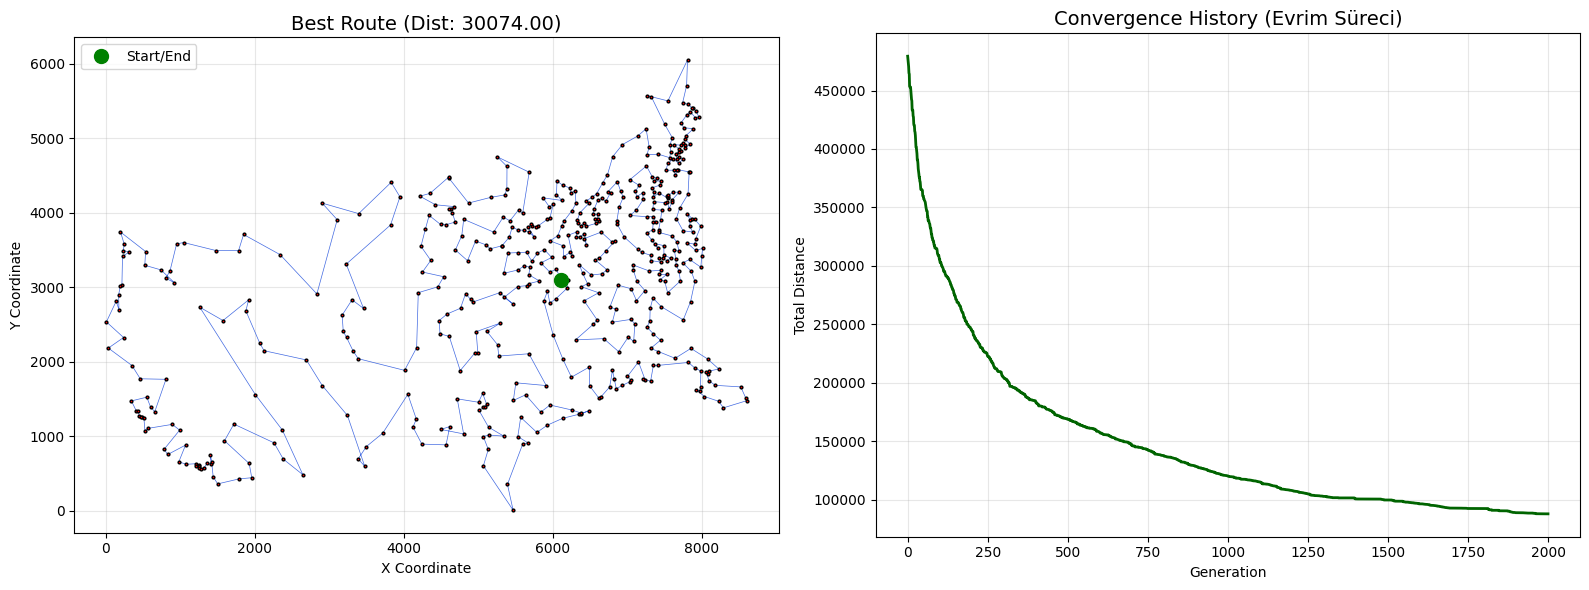

In [7]:
def plot_results(cities, route, history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- Grafik 1: Rota Haritası ---
    # Rotadaki şehirlerin koordinatlarını sırayla al
    route_cities = [cities[i] for i in route]
    # Rotayı kapatmak için başlangıç şehrini sona ekle
    route_cities.append(route_cities[0])
    
    x = [c.x for c in route_cities]
    y = [c.y for c in route_cities]
    
    ax[0].plot(x, y, 'o-', mfc='r', mec='k', markersize=2, linewidth=0.5, color='royalblue')
    ax[0].plot(x[0], y[0], 'go', markersize=10, label='Start/End') # Başlangıç noktası
    
    ax[0].set_title(f"Best Route (Dist: {best_distance:.2f})", fontsize=14)
    ax[0].set_xlabel("X Coordinate")
    ax[0].set_ylabel("Y Coordinate")
    ax[0].legend()
    ax[0].grid(True, alpha=0.3)
    # Harita oranlarını koru (büzüşmesin)
    ax[0].set_aspect('equal', adjustable='box')

    # --- Grafik 2: Fitness Geçmişi ---
    ax[1].plot(history, color='darkgreen', linewidth=2)
    ax[1].set_title("Convergence History (Evrim Süreci)", fontsize=14)
    ax[1].set_xlabel("Generation")
    ax[1].set_ylabel("Total Distance")
    ax[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Çizdir
plot_results(cities, best_route, ga.fitness_history)